In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [134]:
data = pd.read_csv(r"C:\Users\user\Downloads\Cars (2).csv")

In [135]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [137]:
data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [138]:
data.duplicated().any()

False

{'whiskers': [<matplotlib.lines.Line2D at 0x2633c6cfb80>,
 'caps': [<matplotlib.lines.Line2D at 0x2633c850100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2633c6cf8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2633c850640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2633c8508e0>],
 'means': []}

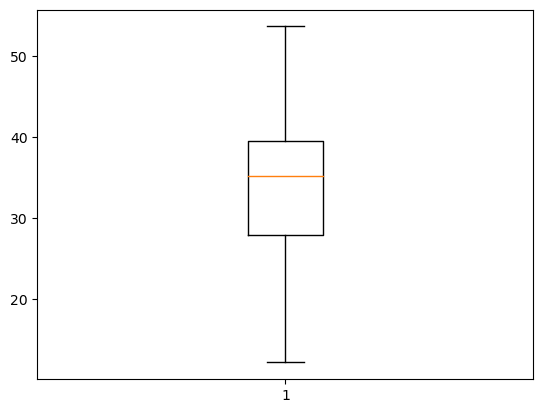

In [139]:
plt.boxplot(data['MPG'])

In [140]:
data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [141]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [142]:
q1 = 84
q2 = 100 
q3 = 140
IQR = q3-q1

In [143]:
        IQR

56

In [144]:
Lower_bound = q1-IQR

In [145]:
Lower_bound

28

In [146]:
Upper_bound = q3+IQR

In [147]:
Upper_bound

196

In [148]:
data.head(2)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833


In [149]:
x = data.drop(['MPG'] , axis = 1)
y = data['MPG']

In [150]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [151]:
model = smf.ols("y~x" , data = data ).fit()

In [152]:
model

In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.54e-23
Time:                        16:58:06   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
x[0]          -0.2054      0.039     -5.239      0.000      -0.284      -0.127
x[1]          -0.3361      0.569     -0.591      0.556      -1.469       0.796
x[2]           0.3956      0.158      2.500      0.015       0.080       0.711
x[3]           0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Transfromation of the datasets

In [154]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [155]:
data_norm = norm_func(data)

In [156]:
data_norm

,HP,MPG,VOL,SP,WT
0,0.000000,1.000000,0.354545,0.065975,0.349986
1,0.021978,0.911362,0.381818,0.084193,0.395709
2,0.021978,0.911362,0.381818,0.084193,0.388381
3,0.076923,0.807585,0.381818,0.198424,0.400142
4,0.014652,0.923161,0.381818,0.069914,0.380215
...,...,...,...,...,...
76,1.000000,0.596132,0.000000,1.000000,0.011267
77,0.692308,0.170594,0.590909,0.728388,0.595690
78,0.783883,0.526419,0.000000,0.742981,0.001523
79,0.901099,0.185879,0.627273,0.976382,0.635921


In [157]:
X = data_norm.drop(['MPG'] , axis =1 )
Y  = data['MPG']

In [158]:
model1 = smf.ols("Y~X" , data = data_norm).fit()

In [159]:
model1

In [160]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.54e-23
Time:                        16:58:10   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.4928      1.571     31.513      0.000      46.365      52.621
X[0]         -56.0861     10.706     -5.239      0.000     -77.409     -34.763
X[1]         -36.9656     62.551     -0.591      0.556    -161.546      87.615
X[2]          27.7072     11.083      2.500      0.015       5.633      49.782
X[3]          14.9354     63.141      0.237      0.814    -110.820     140.691
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

In [161]:
import statsmodels.api as sm

In [162]:
r_square = smf.ols("y~x" , data = data).fit().rsquared

In [163]:
r_square

0.7705372737359844

In [164]:
vif = 1/1-r_square

In [165]:
vif

0.22946272626401565

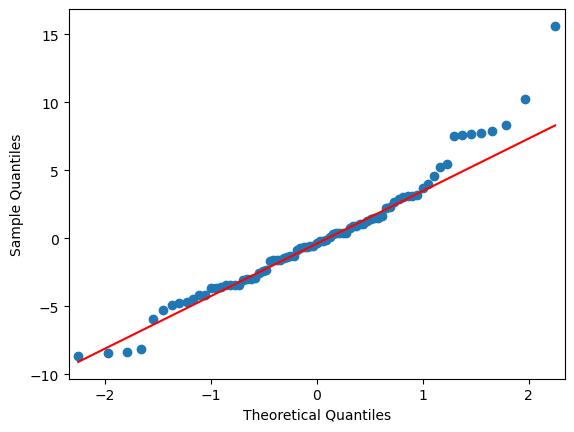

In [166]:
model_resid = sm.qqplot(model.resid , line = "q")

In [167]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

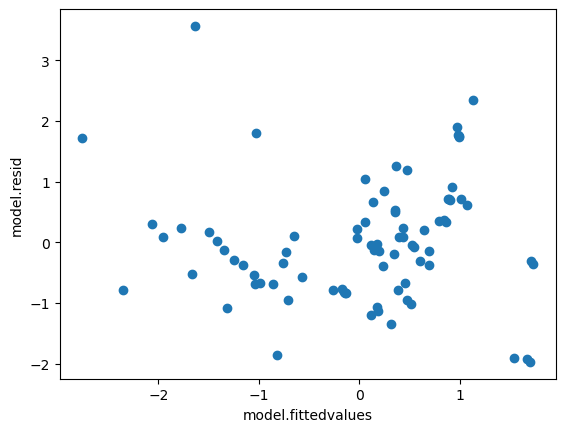

In [168]:
plt.scatter(get_standardized_values(model.fittedvalues) , get_standardized_values(model.resid))
plt.xlabel("model.fittedvalues")
plt.ylabel("model.resid")
plt.show()

In [169]:
model_influence = model.get_influence()

In [170]:
(c , _) = model_influence.cooks_distance

Text(0, 0.5, 'distance')

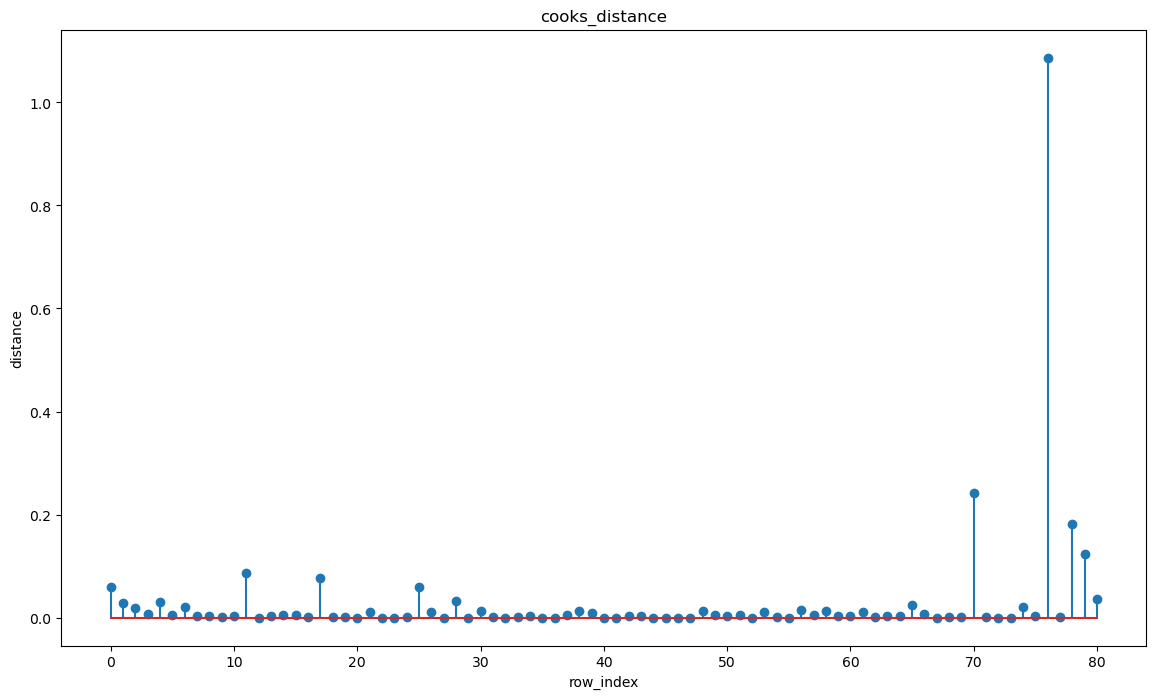

In [171]:
plt.figure(figsize = (14,8))
plt.stem(np.arange(len(data)) , np.round(c,3))
plt.title("cooks_distance")
plt.xlabel("row_index")
plt.ylabel("distance")

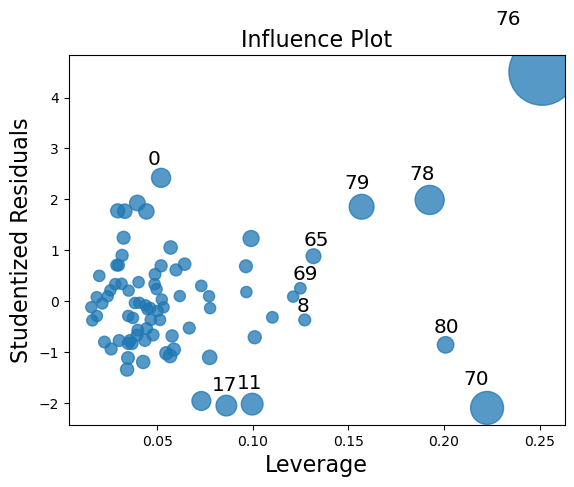

In [172]:
influence_points = influence_plot(model)

In [173]:
data = data.drop(index = [76] , axis = 0)

In [174]:
data.tail(10)

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [175]:
data.reset_index()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [176]:
x_new = data.drop(['MPG'] , axis =1 )

In [177]:
x_new

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
75,175,129,132.864163,42.778219
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [178]:
y_new = data['MPG']

In [179]:
y_new.head(2)

0    53.700681
1    50.013401
Name: MPG, dtype: float64

In [181]:
model_new = smf.ols("y_new~x_new" , data = data ).fit()

In [182]:
model_new

In [183]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_new   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           4.42e-27
Time:                        16:58:46   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
x_new[0]      -0.2266      0.035     -6.413      0.000      -0.297      -0.156
x_new[1]      -0.1855      0.509     -0.364      0.717      -1.199       0.828
x_new[2]       0.4119      0.141      2.913      0.005       0.130       0.694
x_new[3]       0.0375      1.515      0.025      0.980      -2.980       3.055
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""